# Statistic for Data Science and AI

# ECS7024P 

# Coursework-3

## Part-1: Load and prepare data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
#Importing Average Property Price file:
property = pd.read_csv('/Users/deepakverma/Desktop/Statistics/cw3/average-property-price.csv')
property

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [3]:
#Importing Location Codes file:
location = pd.read_csv('/Users/deepakverma/Desktop/Statistics/cw3/location-codes.csv')
location

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


In [4]:
#Seperating the region data of 'E12' perfix code:
E12 = property.loc[(property.Area == 'North East') | (property.Area == 'Yorkshire and The Humber') | (property.Area == 'East Midlands') | (property.Area == 'West Midlands') | (property.Area == 'South West') | (property.Area == 'East of England') | (property.Area == 'South East') | (property.Area == 'North West') | (property.Area == 'London')]
E12

,Date,Area,Code,Detached,Semi,Terraced,Flat
5436,01/09/2016,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
5437,01/10/2016,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
5438,01/11/2016,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
5439,01/12/2016,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
5440,01/01/2017,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [5]:
#Assigning Month in dataframe:
property = property.assign(Month = pd.to_datetime(
 property['Date'], dayfirst=True)).drop(labels='Date', axis=1)
property

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [6]:
region = property.loc[(property.Area == 'North East') | (property.Area == 'Yorkshire and The Humber') | (property.Area == 'East Midlands') | (property.Area == 'West Midlands') | (property.Area == 'South West') | (property.Area == 'East of England') | (property.Area == 'South East') | (property.Area == 'North West') | (property.Area == 'London')]
region

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [7]:
area = property.drop(property[(property.Area == 'North East') | (property.Area == 'Yorkshire and The Humber') | (property.Area == 'East Midlands') | (property.Area == 'West Midlands') | (property.Area == 'South West') | (property.Area == 'East of England') | (property.Area == 'South East') | (property.Area == 'North West') | (property.Area == 'London')].index)
area

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5611,West Midlands Region,E12000005,319537.9676,190279.0815,154811.86030,127222.93950,2019-04-01
5612,West Midlands Region,E12000005,320329.8922,192376.0013,156753.71450,127716.47970,2019-05-01
5613,West Midlands Region,E12000005,320951.6523,192258.4850,155439.68400,128260.62720,2019-06-01
5614,West Midlands Region,E12000005,323864.3209,192892.2598,157084.21000,127749.12570,2019-07-01


In [8]:
#Renaming the Column head:
location.rename(columns = {'AuthorityCode':'Code'}, inplace = True)
location.rename(columns = {'AuthorityName':'Area'}, inplace = True)

In [9]:
area = pd.merge(location, area,  how="right", on=["Code", "Area"]) 
area

,Code,Area,RegionCode,RegionName,Detached,Semi,Terraced,Flat,Month
0,E06000001,Hartlepool,E12000001,North East,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,E06000001,Hartlepool,E12000001,North East,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,E06000001,Hartlepool,E12000001,North East,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,E06000001,Hartlepool,E12000001,North East,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,E06000001,Hartlepool,E12000001,North East,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...,...,...
5467,E12000005,West Midlands Region,NaN,NaN,319537.9676,190279.0815,154811.86030,127222.93950,2019-04-01
5468,E12000005,West Midlands Region,NaN,NaN,320329.8922,192376.0013,156753.71450,127716.47970,2019-05-01
5469,E12000005,West Midlands Region,NaN,NaN,320951.6523,192258.4850,155439.68400,128260.62720,2019-06-01
5470,E12000005,West Midlands Region,NaN,NaN,323864.3209,192892.2598,157084.21000,127749.12570,2019-07-01


In [10]:
#Finding the missing values:
area = area.replace('?',np.NaN)

print('Number of instances = %d' % (area.shape[0]))
print('Number of attributes = %d' % (area.shape[1]))

print('Number of missing values:')
for col in area.columns:
    print('\t%s: %d' % (col,area[col].isna().sum()))

Number of instances = 5472
Number of attributes = 9
Number of missing values:
	Code: 0
	Area: 0
	RegionCode: 396
	RegionName: 396
	Detached: 36
	Semi: 36
	Terraced: 20
	Flat: 0
	Month: 0


## Part-2: Trends

In [11]:
#Using groupby function:
a = region.groupby('Code')

In [12]:
a.size()

Code
E12000001    36
E12000002    36
E12000003    36
E12000004    36
E12000006    36
E12000007    36
E12000008    36
E12000009    36
dtype: int64

In [13]:
#Assigning new names to the regions for plotting:
E1201 = a.get_group('E12000001')
E1202 = a.get_group('E12000002')
E1203 = a.get_group('E12000003')
E1204 = a.get_group('E12000004')
E1205 = a.get_group('E12000005')
E1206 = a.get_group('E12000006')
E1207 = a.get_group('E12000007')
E1208 = a.get_group('E12000008')
E1209 = a.get_group('E12000009')

KeyError: 'E12000005'

NameError: name 'E1205' is not defined

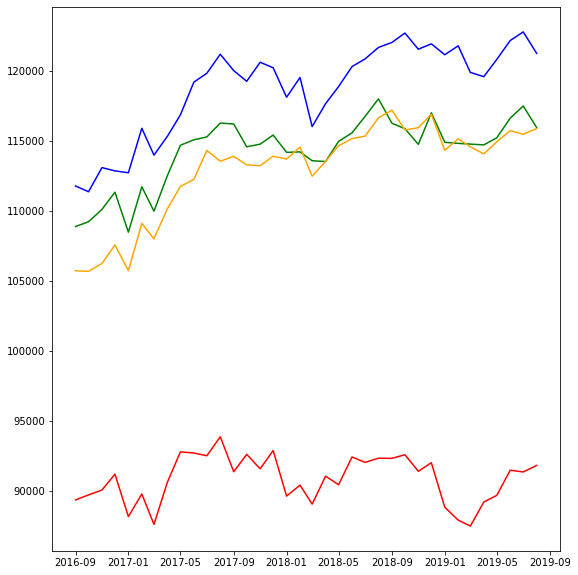

In [14]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd

#Plotting first 5 regions in graph 1 for better understanding of flat price:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(E1201['Month'], E1201['Flat'], color='red', label = "E1201")
plt.plot(E1202['Month'], E1202['Flat'], color='blue', label = "E1202")
plt.plot(E1203['Month'], E1203['Flat'], color='green', label = "E1203")
plt.plot(E1204['Month'], E1204['Flat'], color='orange', label = "E1204")
plt.plot(E1205['Month'], E1205['Flat'], color='black', label = "E1205")
plt.xlabel('Month')
plt.ylabel('Flat price')

#Plotting remainging 4 regions in graph 2 of flat price:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.plot(E1206['Month'], E1206['Flat'], color='lime', label = "E1206")
plt.plot(E1207['Month'], E1207['Flat'], color='cyan', label = "E1207")
plt.plot(E1208['Month'], E1208['Flat'], color='coral', label = "E1208")
plt.plot(E1209['Month'], E1209['Flat'], color='indigo', label = "E1209")
plt.xlabel('Month')
plt.ylabel('Flat price')
plt.legend()

NameError: name 'E1205' is not defined

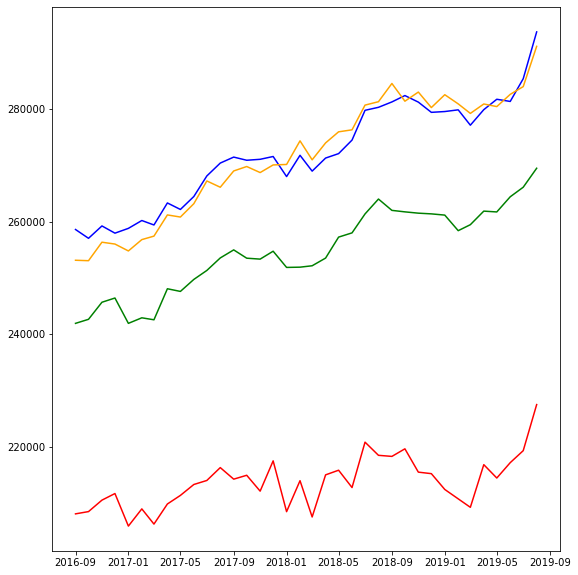

In [15]:
#Plotting first 5 regions in graph 3 for better understanding of Detached price:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(E1201['Month'], E1201['Detached'], color='red', label = "E1201")
plt.plot(E1202['Month'], E1202['Detached'], color='blue', label = "E1202")
plt.plot(E1203['Month'], E1203['Detached'], color='green', label = "E1203")
plt.plot(E1204['Month'], E1204['Detached'], color='orange', label = "E1204")
plt.plot(E1205['Month'], E1205['Detached'], color='black', label = "E1205")
plt.xlabel('Month')
plt.ylabel('Detached price')

#Plotting remaining 4 regions in graph 4 for better understanding of Detached price:
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.plot(E1206['Month'], E1206['Detached'], color='lime', label = "E1206")
plt.plot(E1207['Month'], E1207['Detached'], color='cyan', label = "E1207")
plt.plot(E1208['Month'], E1208['Detached'], color='coral', label = "E1208")
plt.plot(E1209['Month'], E1209['Detached'], color='indigo', label = "E1209")
plt.xlabel('Month')
plt.ylabel('Detached price')
plt.legend()

**Inference**
1. North East region shows the overall strong increment in price out of all the regions in both flat and detached property.
2. Yorkshire, East Midlands and West Midlands regions also shows great growth in both flat and detached property. Whereas regions South West, East of England, South East, North West and London shows little to no growth except the South West in flat property. Hence, in the South West region people preferred to buy detached property instead of flat.
3. During christmas month, prices of flat in every region show spike in the price. Hence, people are more likely to buy new flat in december. 
4. During the new year, the price of both flat and detached properties in every region has been dropped or either remained constant.
5. Comparetively, South East property price is the most expensive out of all regions.

# Part-3: Price changes

In [42]:
#
m2017 = (area['Month'] == '2017-07-01')
b1 = area.loc[m2017]
m2018 = (area['Month'] == '2018-07-01')
b2 = area.loc[m2018]

In [50]:
difference = pd.merge(b2,b1,on='Code',how='left')
difference = difference.fillna('London')
difference

,Code,Area_x,RegionCode_x,RegionName_x,Detached_x,Semi_x,Terraced_x,Flat_x,Month_x,Area_y,RegionCode_y,RegionName_y,Detached_y,Semi_y,Terraced_y,Flat_y,Month_y
0,E06000001,Hartlepool,E12000001,North East,180836.5829,108917.0807,76843.00978,61116.82158,2018-07-01,Hartlepool,E12000001,North East,186030.1497,112168.0127,79436.27053,65007.84170,2017-07-01
1,E06000002,Middlesbrough,E12000001,North East,195242.2776,114478.78,81719.20818,69313.90788,2018-07-01,Middlesbrough,E12000001,North East,187695.9901,111107.0273,79505.65683,69163.06963,2017-07-01
2,E06000003,Redcar and Cleveland,E12000001,North East,193610.9431,121328.4945,91356.79184,64802.79724,2018-07-01,Redcar and Cleveland,E12000001,North East,187618.379,117895.4611,89473.56935,65507.80990,2017-07-01
3,E06000004,Stockton-on-Tees,E12000001,North East,217157.66,126721.7533,98056.49338,83654.55272,2018-07-01,Stockton-on-Tees,E12000001,North East,210016.651,123232.6999,95599.36140,83599.32806,2017-07-01
4,E06000005,Darlington,E12000001,North East,226111.4674,135207.6796,101324.3455,83679.31818,2018-07-01,Darlington,E12000001,North East,227479.697,136030.9295,102533.59940,87041.37973,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,E10000029,Suffolk,E12000006,East of England,370793.9793,232946.0909,188202.338,142488.46480,2018-07-01,Suffolk,E12000006,East of England,353962.67,222352.9988,181134.70370,140278.18370,2017-07-01
147,E10000030,Surrey,E12000008,South East,807900.6081,465170.1267,373357.0516,267144.69100,2018-07-01,Surrey,E12000008,South East,786923.858,455596.0847,366461.71500,270116.52610,2017-07-01
148,E10000031,Warwickshire,E12000005,West Midlands,399930.9556,235098.5494,194531.7661,167470.71860,2018-07-01,Warwickshire,E12000005,West Midlands,380046.1182,223519.0122,185720.66520,165676.94800,2017-07-01
149,E10000032,West Sussex,E12000008,South East,545859.8494,353171.1349,283575.1621,191835.79530,2018-07-01,West Sussex,E12000008,South East,529397.3694,342983.0789,276630.46710,193547.45490,2017-07-01


In [44]:
difference['Diff'] = difference['Flat_y'] - difference['Flat_x']
change = difference.loc[:,["Area_x","Diff","RegionName_x","Code"]]
change

,Area_x,Diff,RegionName_x,Code
0,Hartlepool,3891.02012,North East,E06000001
1,Middlesbrough,-150.83825,North East,E06000002
2,Redcar and Cleveland,705.01266,North East,E06000003
3,Stockton-on-Tees,-55.22466,North East,E06000004
4,Darlington,3362.06155,North East,E06000005
...,...,...,...,...
146,Suffolk,-2210.28110,East of England,E10000029
147,Surrey,2971.83510,South East,E10000030
148,Warwickshire,-1793.77060,West Midlands,E10000031
149,West Sussex,1711.65960,South East,E10000032


In [45]:
difference['RegionName_x'] = difference['RegionName_x'].astype(str)
difference

,Code,Area_x,RegionCode_x,RegionName_x,Detached_x,Semi_x,Terraced_x,Flat_x,Month_x,Area_y,RegionCode_y,RegionName_y,Detached_y,Semi_y,Terraced_y,Flat_y,Month_y,Diff
0,E06000001,Hartlepool,E12000001,North East,180836.5829,108917.0807,76843.00978,61116.82158,2018-07-01,Hartlepool,E12000001,North East,186030.1497,112168.0127,79436.27053,65007.84170,2017-07-01,3891.02012
1,E06000002,Middlesbrough,E12000001,North East,195242.2776,114478.78,81719.20818,69313.90788,2018-07-01,Middlesbrough,E12000001,North East,187695.9901,111107.0273,79505.65683,69163.06963,2017-07-01,-150.83825
2,E06000003,Redcar and Cleveland,E12000001,North East,193610.9431,121328.4945,91356.79184,64802.79724,2018-07-01,Redcar and Cleveland,E12000001,North East,187618.379,117895.4611,89473.56935,65507.80990,2017-07-01,705.01266
3,E06000004,Stockton-on-Tees,E12000001,North East,217157.66,126721.7533,98056.49338,83654.55272,2018-07-01,Stockton-on-Tees,E12000001,North East,210016.651,123232.6999,95599.36140,83599.32806,2017-07-01,-55.22466
4,E06000005,Darlington,E12000001,North East,226111.4674,135207.6796,101324.3455,83679.31818,2018-07-01,Darlington,E12000001,North East,227479.697,136030.9295,102533.59940,87041.37973,2017-07-01,3362.06155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,E10000029,Suffolk,E12000006,East of England,370793.9793,232946.0909,188202.338,142488.46480,2018-07-01,Suffolk,E12000006,East of England,353962.67,222352.9988,181134.70370,140278.18370,2017-07-01,-2210.28110
147,E10000030,Surrey,E12000008,South East,807900.6081,465170.1267,373357.0516,267144.69100,2018-07-01,Surrey,E12000008,South East,786923.858,455596.0847,366461.71500,270116.52610,2017-07-01,2971.83510
148,E10000031,Warwickshire,E12000005,West Midlands,399930.9556,235098.5494,194531.7661,167470.71860,2018-07-01,Warwickshire,E12000005,West Midlands,380046.1182,223519.0122,185720.66520,165676.94800,2017-07-01,-1793.77060
149,E10000032,West Sussex,E12000008,South East,545859.8494,353171.1349,283575.1621,191835.79530,2018-07-01,West Sussex,E12000008,South East,529397.3694,342983.0789,276630.46710,193547.45490,2017-07-01,1711.65960


Text(0.5, 1.0, 'Region vs Change in price')

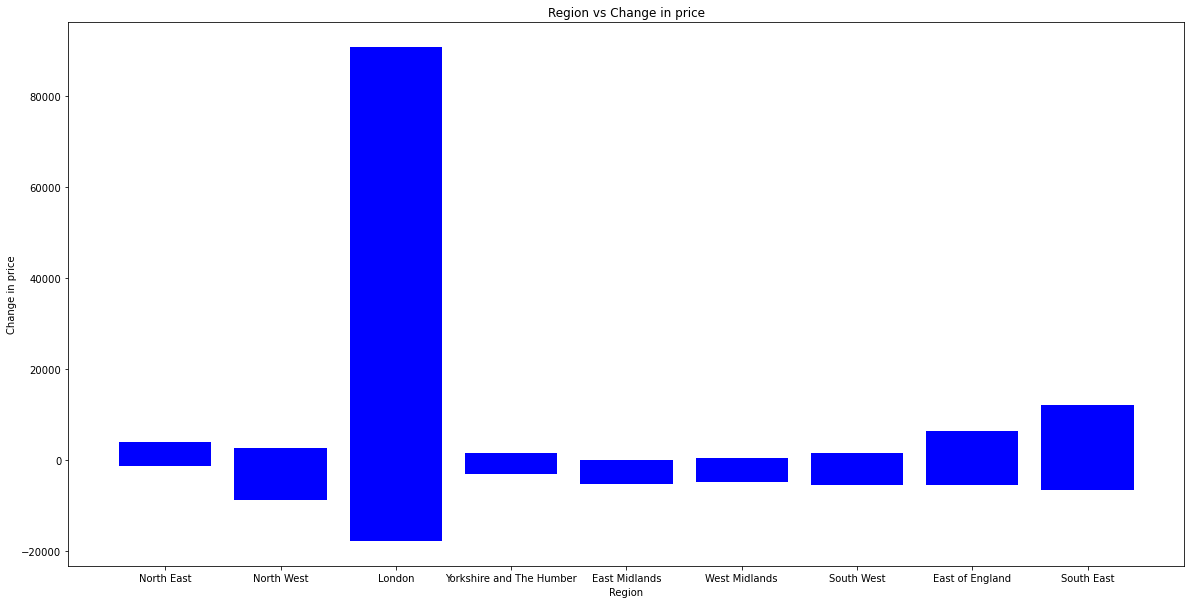

In [46]:
plt.figure(figsize = (20, 10))
plt.bar(difference['RegionName_x'],difference['Diff'],color='Blue')
plt.xlabel('Region')
plt.ylabel('Change in price')
plt.title('Region vs Change in price')

# Part-4: Statistical Analysis

In [47]:
#Code for assigning 'change' whether the property price increased or decreased:
def inc(row):
    if(row.Diff > 0): return 'Decrease'
    elif(row.Diff < 0): return 'Increase'
change = newdf.assign(newdf = newdf.apply(inc,axis=1))
change

,Month_x,Flat_x,Code,RegionName_x,Month_y,Flat_y,RegionName_y,Diff,newdf
0,2017-07-01,65007.84170,E06000001,North East,2018-07-01,61116.82158,North East,3891.02012,Decrease
1,2017-07-01,69163.06963,E06000002,North East,2018-07-01,69313.90788,North East,-150.83825,Increase
2,2017-07-01,65507.80990,E06000003,North East,2018-07-01,64802.79724,North East,705.01266,Decrease
3,2017-07-01,83599.32806,E06000004,North East,2018-07-01,83654.55272,North East,-55.22466,Increase
4,2017-07-01,87041.37973,E06000005,North East,2018-07-01,83679.31818,North East,3362.06155,Decrease
...,...,...,...,...,...,...,...,...,...
146,2017-07-01,140278.18370,E10000029,East of England,2018-07-01,142488.46480,East of England,-2210.28110,Increase
147,2017-07-01,270116.52610,E10000030,South East,2018-07-01,267144.69100,South East,2971.83510,Decrease
148,2017-07-01,165676.94800,E10000031,West Midlands,2018-07-01,167470.71860,West Midlands,-1793.77060,Increase
149,2017-07-01,193547.45490,E10000032,South East,2018-07-01,191835.79530,South East,1711.65960,Decrease


In [48]:
#Making cross-tabulate:
df = pd.crosstab(change.newdf,[change.RegionName_x])
df

RegionName_x,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
newdf,,,,,,,,,
Decrease,0,5,22,9,11,13,6,2,7
Increase,7,5,9,3,11,6,7,11,7


In [39]:
#Chi-square test:
import scipy.stats as stats
test_stat, p_value, dof, expected = stats.chi2_contingency(df, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 23.86
The p-value is 0.242 %


**Inference**
1. Only east midlands shows increment of price in all of its properties whereas the number of properties of increased and decreased remains constant in east of england, north west & yorkshire and the humber.
2. London and south regions have more number of decrease price in the property whereas only west midlands have only 2 property of decreased price.
3. A chi-square(X^2) statistic test measures how a model compares to actual observed value and a chi-squared test statistic obtained is 23.86. Under null hypothesis, this sum has approximately a chi-squared distribution whose number of degree of freedoms is 8 and have no relation between the categorical variables.
4. The p-value obtained is 0.242 which is high and means that lower the level of statistically significance of the observed difference. Since we do not have the observed difference, it is impossible to determine the result of chi-squared test.